# Capstone project 1
Data wrangling

This is a short document describing the data wrangling steps that I undertook to clean the capstone project data set. What kind of cleaning steps did you perform? How did you deal with missing values, if any? Were there outliers, and how did you decide to handle them? This document will eventually become part of your milestone report.

The dataset I chose to work with was obtained from kaggle.
### Background

Living around the NYC area for a while, I’ve seen a lot of different traffic situations. Narrow streets and complicated traffic rules, as well as unreasonable traffic light durations and fearless pedestrians maybe all contributing to the vehicle collisions in NYC. Based on this dataset it’s possible to find out the most dangerous locations in 5 boroughs, the relations between number of collisions and time of a day (since there’re morning and evening peaks in a city like New York) or a year (due to influence of weather). 

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
import seaborn as sns
sns.set()

In [115]:
df=pd.read_csv('NYC.csv')

Visually inspect the dataset first

In [116]:
df.shape

(477732, 29)

In [117]:
df.columns

Index(['UNIQUE KEY', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE',
       'VEHICLE 5 TYPE', 'VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR',
       'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
UNIQUE KEY             477732 non-null int64
DATE                   477732 non-null object
TIME                   477732 non-null object
BOROUGH                338390 non-null object
ZIP CODE               338329 non-null float64
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
LOCATION               356600 non-null object
ON STREET NAME         364552 non-null object
CROSS STREET NAME      335574 non-null object
OFF STREET NAME        58511 non-null object
PERSONS INJURED        477732 non-null int64
PERSONS KILLED         477732 non-null int64
PEDESTRIANS INJURED    477732 non-null int64
PEDESTRIANS KILLED     477732 non-null int64
CYCLISTS INJURED       477732 non-null int64
CYCLISTS KILLED        477732 non-null int64
MOTORISTS INJURED      477732 non-null int64
MOTORISTS KILLED       477732 non-null int64
VEHICLE 1 TYPE        

In [119]:
#Convert column headers to lowercase so it's easier to type
df.columns = [x.lower() for x in df.columns]

We've seen date and time in column names, it's neccessary to convert them into ISO standard if they're not.

In [120]:
df.date=pd.to_datetime(df.date)
df.date.head()


0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [121]:
by_borough=pd.DataFrame(df.borough.value_counts(dropna=False))


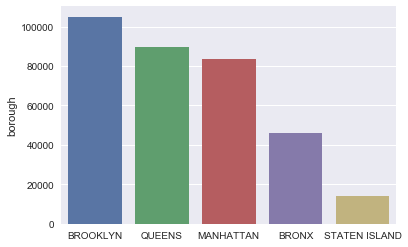

In [122]:
sns.barplot(x=by_borough.index,y='borough',data=by_borough)
plt.show()

I really thought Manhattan would have the biggest number of collisions since it's more crowded in my mind. Given this count number it's actually Brooklyn, and even queens is going beyond Manhattan.

In [123]:
#Look for null values in each column
null=df.isnull().sum()
#I decide to remove columns with over 90% null value here
remove=null[null>(0.9*len(df))]
#remove parameters for vehicle 3,4,5
del df['vehicle 3 type']
del df['vehicle 4 type']
del df['vehicle 5 type']
del df['vehicle 3 factor']
del df['vehicle 4 factor']
del df['vehicle 5 factor']


In [124]:
df.shape

(477732, 23)

Drop duplicate data if there's any

In [125]:
df=df.drop_duplicates()

In [126]:
df.shape

(477732, 23)

Oh good, looks like there is no duplicate data. So we're continuing for outliers.

In [127]:
df[['persons killed','persons injured']].describe()

,persons killed,persons injured
count,477732.000000,477732.000000
mean,0.001059,0.247875
std,0.034037,0.644326
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3.000000,32.000000


There's a max value of 'persons injured' column 32, I'd like to take a look at that collision.

In [128]:
out=df[df['persons injured'] >= 30]
out

,unique key,date,time,borough,zip code,latitude,longitude,location,on street name,cross street name,...,pedestrians injured,pedestrians killed,cyclists injured,cyclists killed,motorists injured,motorists killed,vehicle 1 type,vehicle 2 type,vehicle 1 factor,vehicle 2 factor
58179,3204269,2015-04-17,11:43,QUEENS,11427.0,40.724159,-73.754968,"(40.7241585, -73.7549679)",HILLSIDE AVENUE,HOLLIS COURT BOULEVARD,...,2,0,0,0,30,0,SMALL COM VEH(4 TIRES),BUS,PHYSICAL DISABILITY,UNSPECIFIED


We see there was a bus involved in the collision, which makes sense why there were 32 people got injured. But this is an outlier and we'll not include it for analysis.

/Users/yangruichen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


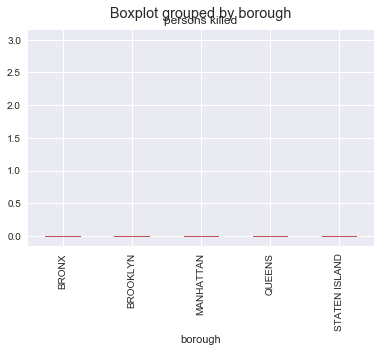

In [129]:
df.boxplot(column='persons killed',by='borough',rot=90)
plt.show()

Also good to see there's no more outliers.

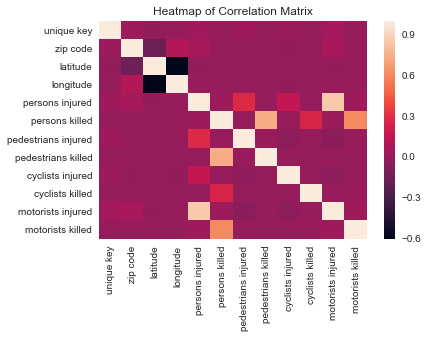

In [130]:
#Run heatmap for numerical columns to see how they're related
col_corr =df.corr()
sns.heatmap(col_corr)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Then I would like to find out the distribution of number of collisions among years and among months in each year.

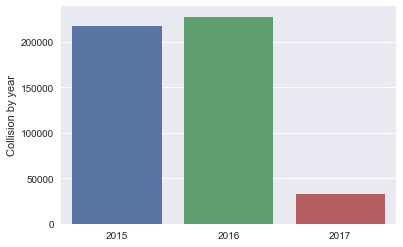

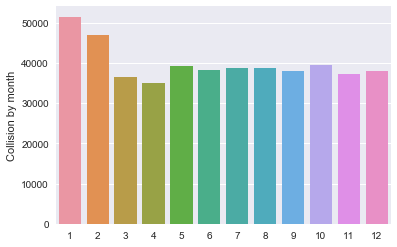

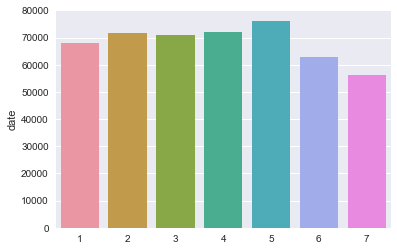

In [142]:
df.year=df['date'].dt.year
df.month=df['date'].dt.month
df.day=df['date'].dt.dayofweek+1
year_data=pd.DataFrame(df.year.value_counts())
month_data=pd.DataFrame(df.month.value_counts())
day_data=pd.DataFrame(df.day.value_counts())
sns.barplot(x=year_data.index,y='date',data=year_data)
plt.ylabel('Collision by year')
plt.show()

sns.barplot(x=month_data.index,y='date',data=month_data)
plt.ylabel('Collision by month')
plt.show()

sns.barplot(x=day_data.index,y='date',data=day_data)
plt.show()

The plots make sense that the dataset of year 2017 is incomplete(only until the end of February 2017). So we see the obvious difference among years and among months. 
For now it looks like more collisions happened in January and February. But as we knew there are more data for these two months let's take a look at the plot with data only from 2015 and 2016.

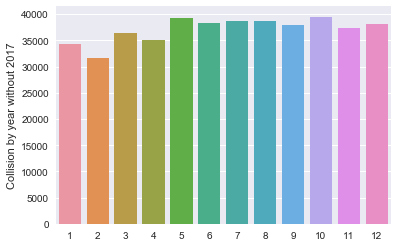

In [160]:
sub1=pd.DataFrame(df[df.year == 2015])
sub2=pd.DataFrame(df[df.year == 2016])
sub=sub1.append(sub2)
sub.month=sub['date'].dt.month
month_data=pd.DataFrame(sub.month.value_counts())
sns.barplot(x=month_data.index,y='date',data=month_data)
plt.ylabel('Collision by year without 2017')
plt.show()

Now we get a neater plot of collision distribution by months. January and February are no longer leading. Instead we found May and October have rather more collisions. It's complicated to conclude why are these two months higher only from this dataset.

vehicle factors and types

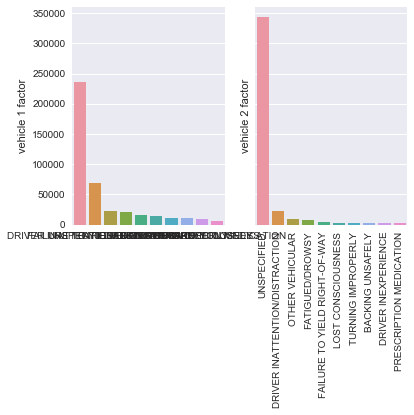

In [183]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

df_v_f1=pd.DataFrame(df['vehicle 1 factor'].value_counts())
df_v_f2=pd.DataFrame(df['vehicle 2 factor'].value_counts())
v_f1=sns.barplot(x=df_v_f1.head(10).index, y='vehicle 1 factor', data=df_v_f1.head(10),ax=ax1)
v_f2=sns.barplot(x=df_v_f2.head(10).index, y='vehicle 2 factor', data=df_v_f2.head(10),ax=ax2)
plt.xticks(rotation=90)
plt.show()